In [8]:
import pandas as pd
import numpy as np

In [9]:
df=pd.read_csv('/content/mw_pw_profiles.txt',low_memory=False)

In [10]:
print(df.shape)

(416712, 58)


In [11]:
df.columns

Index(['player_id', 'match_id', 'gender', 'balls_per_over', 'start_date',
       'series_name', 'match_type', 'name_x', 'runs_scored', 'player_out',
       'balls_faced', 'fours_scored', 'sixes_scored', 'catches_taken',
       'run_out_direct', 'run_out_throw', 'stumpings_done', 'out_kind',
       'dot_balls_as_batsman', 'order_seen', 'balls_bowled', 'runs_conceded',
       'wickets_taken', 'bowled_done', 'lbw_done', 'maidens',
       'dot_balls_as_bowler', 'player_team', 'opposition_team', 'name_y',
       'unique_name', 'key_bcci', 'key_bcci_2', 'key_bigbash', 'key_cricbuzz',
       'key_cricheroes', 'key_crichq', 'key_cricinfo', 'key_cricinfo_2',
       'key_cricinfo_3', 'key_cricingif', 'key_cricketarchive',
       'key_cricketarchive_2', 'key_cricketworld', 'key_nvplay',
       'key_nvplay_2', 'key_opta', 'key_opta_2', 'key_pulse', 'key_pulse_2',
       'full_name', 'batting_style', 'bowling_style', 'playing_role', 'teams',
       'fantasy_score_batting', 'fantasy_score_bowling',


In [41]:
X=df[['fantasy_score_batting','fantasy_score_bowling']]
#X=df.drop(columns=['player_id','match_id','gender','balls_per_over','start_date','series_name','match_type','name_x','out_kind','player_team','opposition_team','name_y','unique_name','key_bcci','key_bcci_2','teams'])

In [42]:
y=df['fantasy_score_total']

In [26]:
X=df.drop(columns=['player_id','match_id','gender','balls_per_over','start_date','series_name','match_type','name_x','out_kind','player_team','opposition_team','name_y','unique_name','key_bcci','key_bcci_2','teams'])

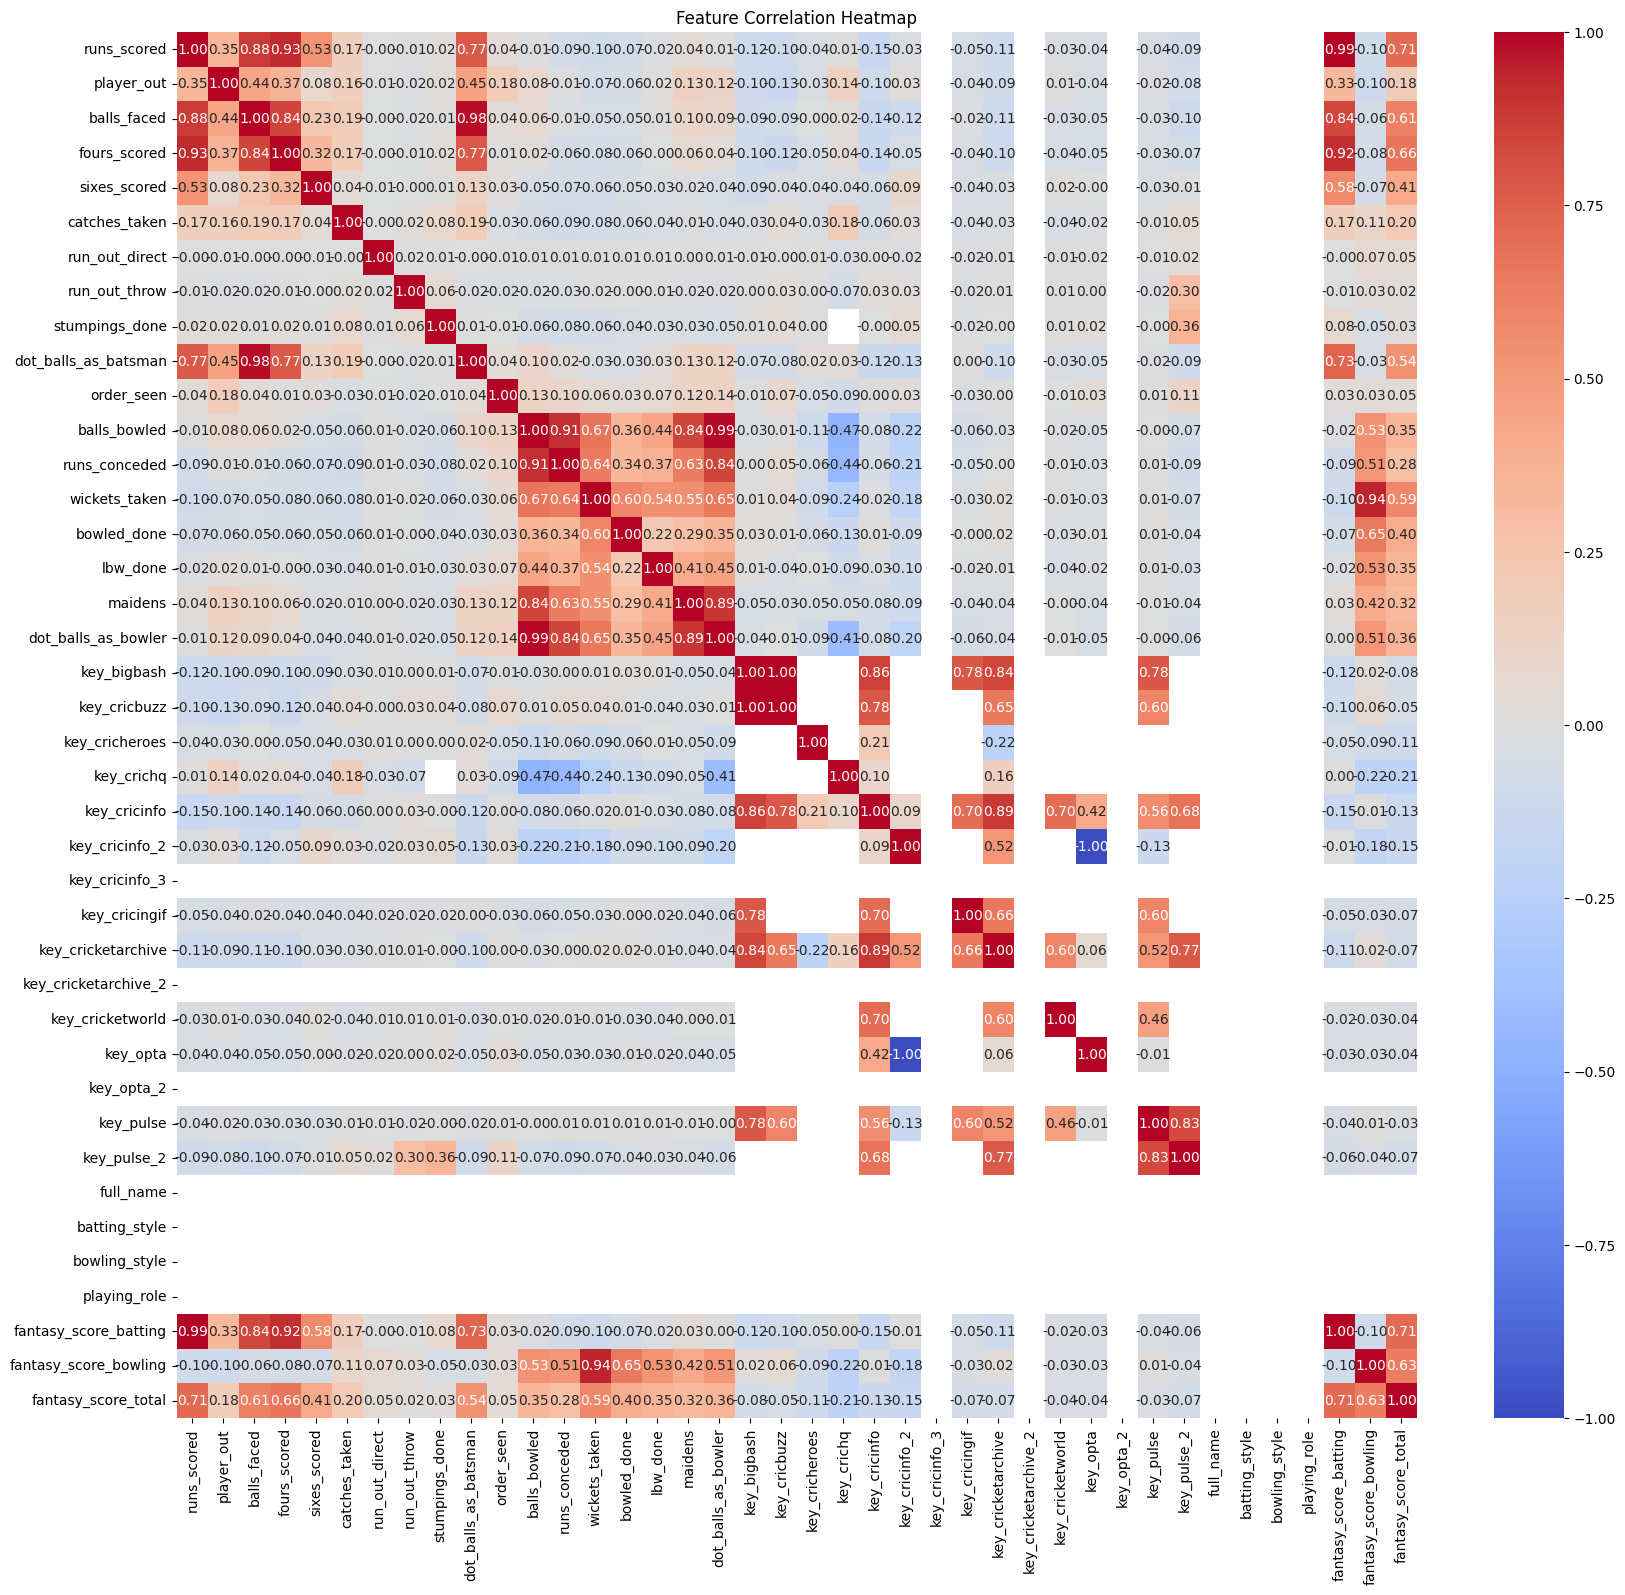

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = X.corr(numeric_only=True)
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


In [43]:
w=np.zeros(X.shape[1])
b=0
lr=.001
epochs=10

In [44]:
for epoch in range(epochs):
    Y = X @ w + b
    dw = (2 / X.shape[0]) * (X.T @ (Y - y))
    db = (2 / X.shape[0]) * np.sum(Y - y)
    w -= lr * dw
    b -= lr * db

print(b)

print(w)


-459.2624424695915
fantasy_score_batting   -23610.899279
fantasy_score_bowling   -16707.241220
dtype: float64


R²: 0.9987


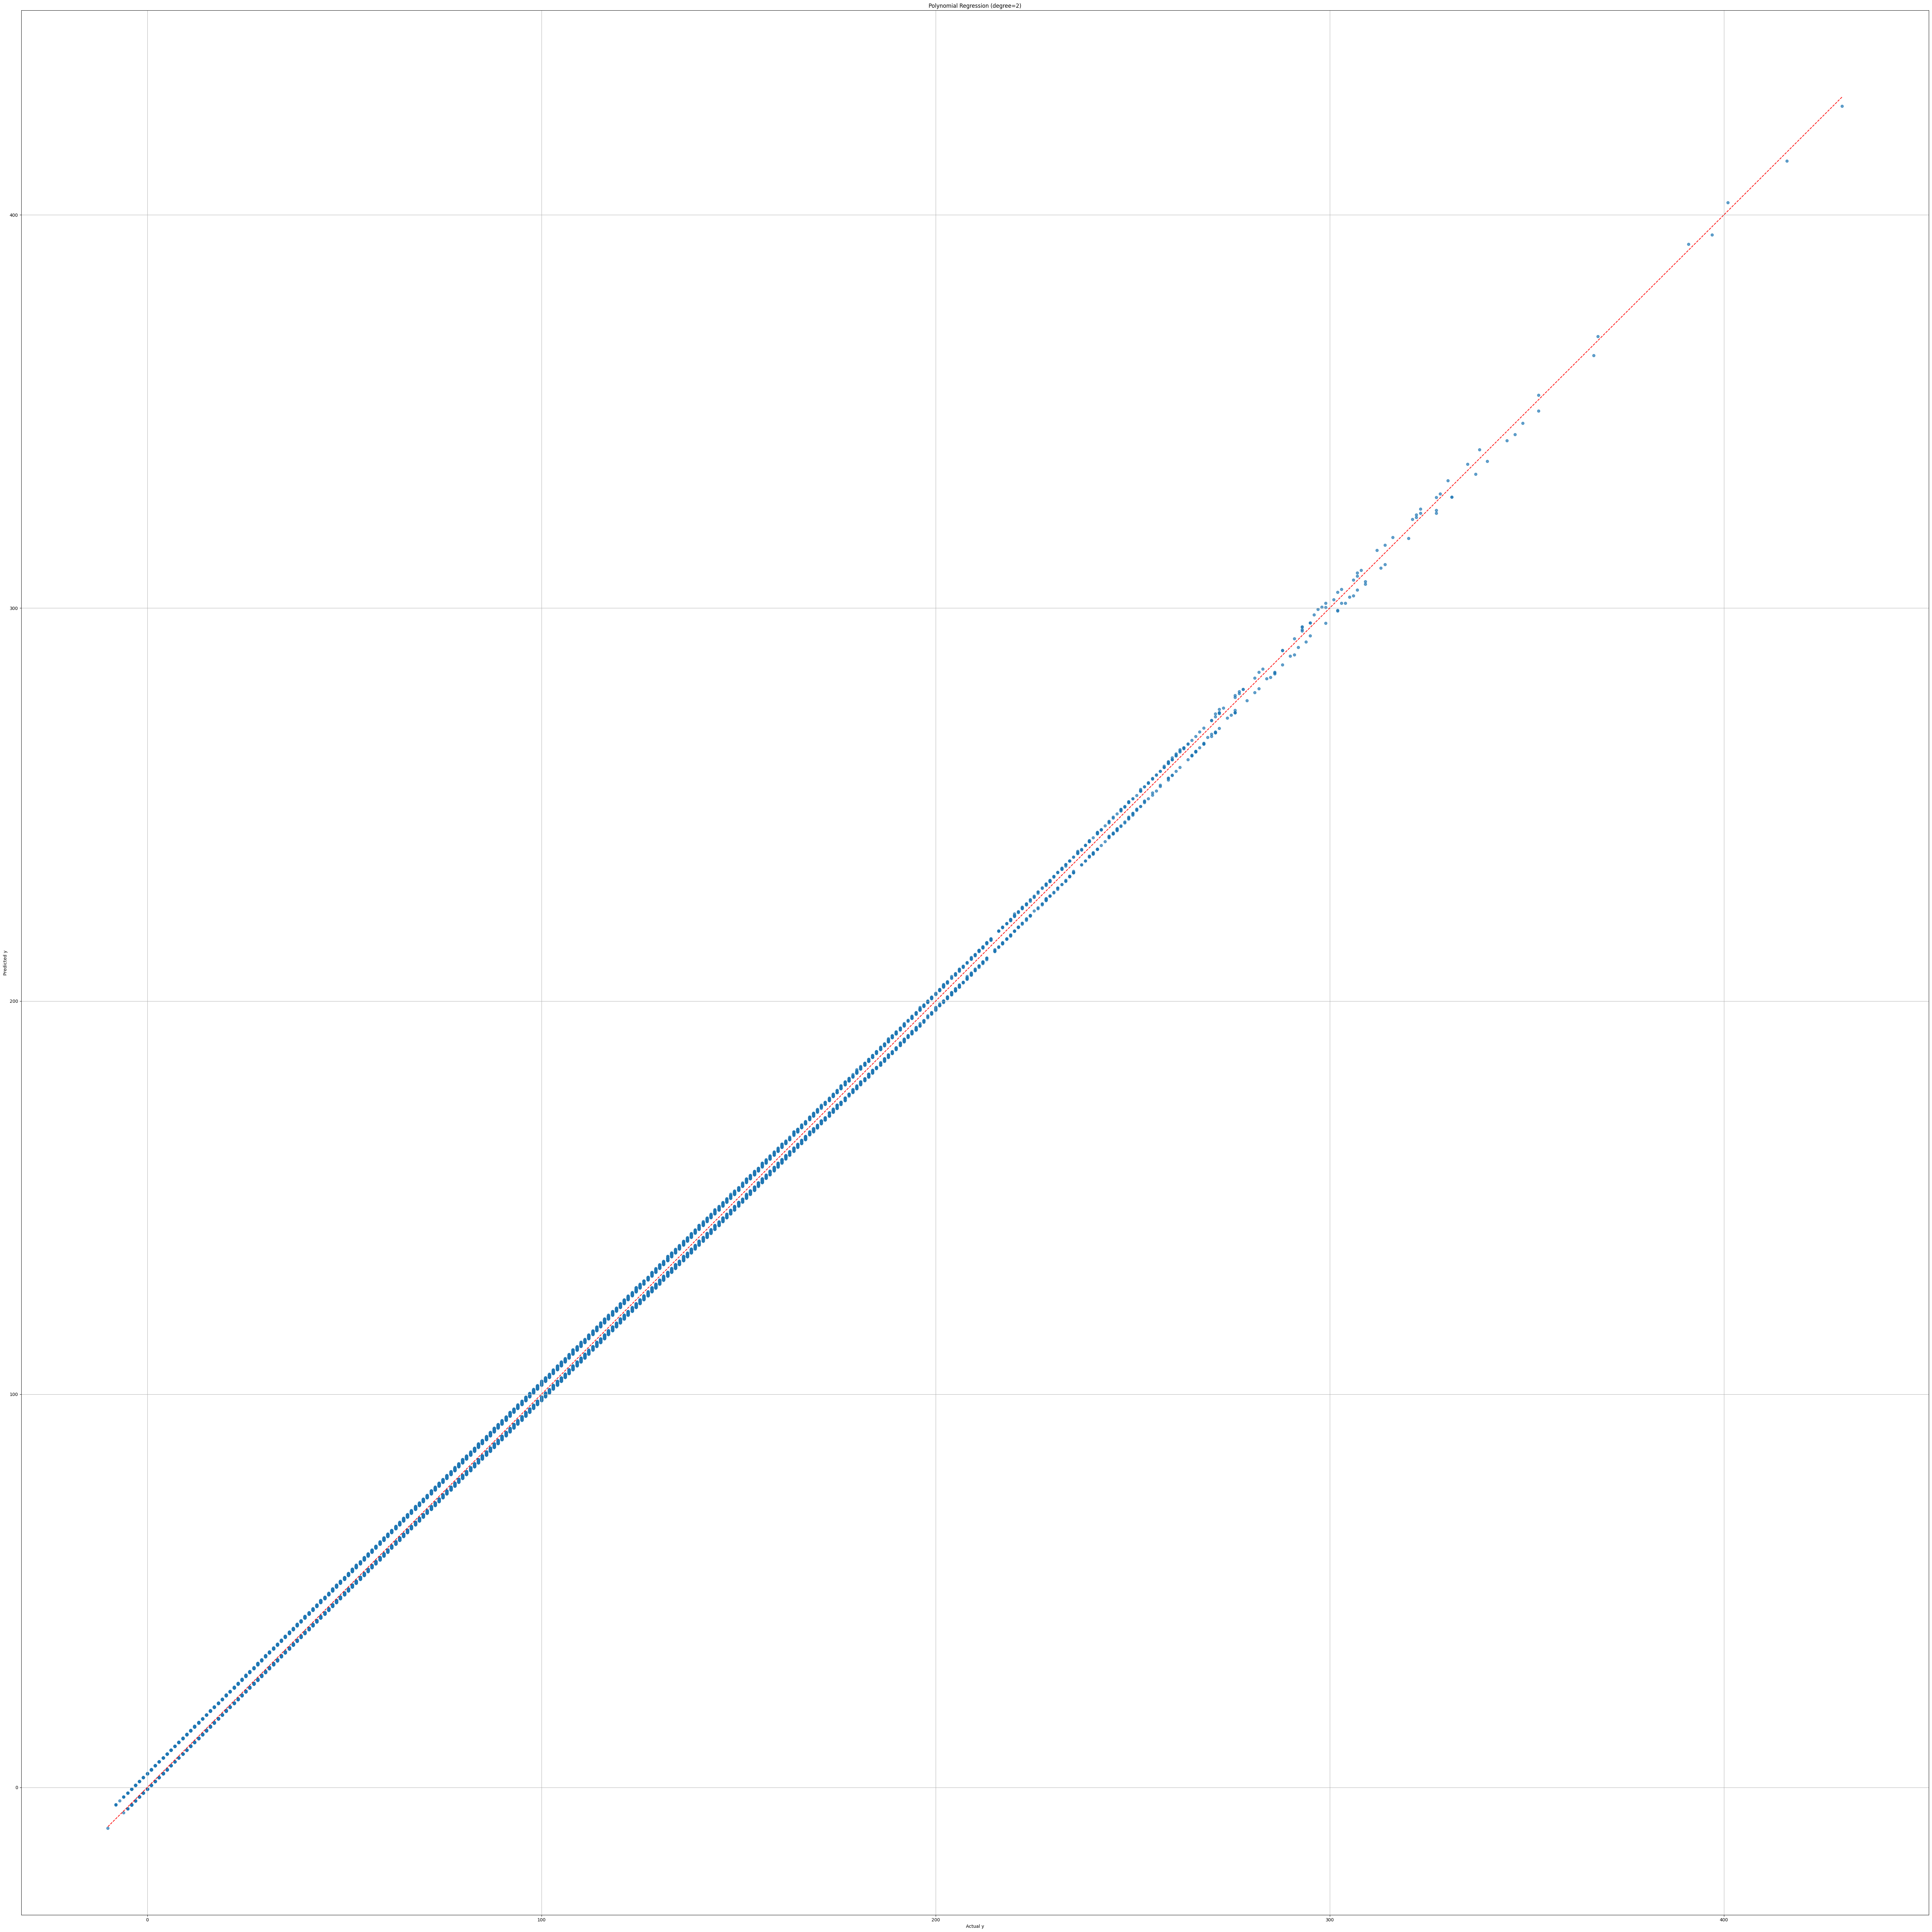

In [47]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#imported polynomial fteatures from scikit learn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

poly = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

r2 = model.score(X_test_poly, y_test)
print(f"R²: {r2:.4f}")

plt.figure(figsize=(60,60))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Polynomial Regression (degree=2)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
X=df[['fantasy_score_batting','fantasy_score_bowling']]
#X=df.drop(columns=['player_id','match_id','gender','balls_per_over','start_date','series_name','match_type','name_x','out_kind','player_team','opposition_team','name_y','unique_name','key_bcci','key_bcci_2','teams'])

In [21]:
y=df['fantasy_score_total']

In [22]:
X.shape

(416712, 2)

In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Optional: Enable GPU memory growth (safe setting)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
else:


# === 2. Train/test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# === 3. Scale features ===
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# === 4. Build the model ===
model = Sequential([
    Dense(16, activation='relu', input_shape=(2,)),
    Dense(8, activation='relu'),
    Dense(1)
])

# === 5. Compile the model ===
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# === 6. Train the model ===
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# === 7. Evaluate the model ===
loss, mae = model.evaluate(X_test, y_test)
print(f"\nTest MSE: {loss:.4f}, MAE: {mae:.4f}")




GPU available and memory growth set.
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20836/20836 ━━━━━━━━━━━━━━━━━━━━ 64s 2ms/step - loss: 59.6533 - mae: 2.3454
Epoch 2/100
20836/20836 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 2.4713 - mae: 1.1719
Epoch 3/100
20836/20836 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 2.4471 - mae: 1.1632
Epoch 4/100
20836/20836 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - loss: 2.4324 - mae: 1.1620
Epoch 5/100
20836/20836 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 2.4108 - mae: 1.1613
Epoch 6/100
20836/20836 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 2.4284 - mae: 1.1674
Epoch 7/100
20836/20836 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 2.4174 - mae: 1.1648
Epoch 8/100
20836/20836 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 2.4029 - mae: 1.1576
Epoch 9/100
20836/20836 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - loss: 2.4078 - mae: 1.1620
Epoch 10/100
20836/20836 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 2.3929 - mae: 1.1563
Epoch 11/100
20836/20836 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 2.3863 - mae: 1.1540
Epoch 12/100
20836/20836 ━━━━━━━━━━━━━━━━━━━━ 82s 2m

KeyboardInterrupt: 